In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date
import seaborn as sns
from datetime import date, timedelta, datetime
import os
import common_functions as cf

In [3]:
downloads_path = "C:\\Users\\Hannah Nevel\\Downloads"

# define file paths and import data as dataframes
investments_filepath = downloads_path + "\\CM Report  Year to Date Investments-2024-03-19-07-49-48.xlsx"
conversions_filepath = downloads_path+ "\\Year to Date Conversions Schedule-2024-03-19-07-49-43.xlsx"
phoneburner_mtd_filepath = downloads_path + "\\3-19-2024 MTD.csv"
phoneburner_ytd_filepath = downloads_path + "\\3-19-2024 YTD.csv"
newlead_count_filepath = downloads_path +  "\\Year to Date New Leads-2024-03-19-07-49-58.xlsx"
touched_count_filepath = downloads_path + "\\CM Report  Year to Date Accts Touched-2024-03-19-07-49-49.xlsx"
calendly_past_filepath = downloads_path + "\\events-export 3-19-2024.csv"




yearly_investment_data = pd.read_excel(investments_filepath)
ytd_conversion_list = pd.read_excel(conversions_filepath)
mtd_loaded_phone_data = pd.read_csv(phoneburner_mtd_filepath)
yearly_phone_data = pd.read_csv(phoneburner_ytd_filepath)
yearly_newlead_data = pd.read_excel(newlead_count_filepath)
yearly_acctstouched_data = pd.read_excel(touched_count_filepath)
calendly_past = pd.read_csv(calendly_past_filepath)

c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no de

In [4]:
mtd_loaded_phone_data['Notes'] = mtd_loaded_phone_data['Notes'].astype(str)

In [5]:
yearly_phone_data.drop(['Unnamed: 0'],axis=1,inplace=True)
yearly_phone_data.dropna(axis=0,inplace=True)

In [6]:
yearly_phone_data = yearly_phone_data[(yearly_phone_data['Agent'] != 'Sean Goodnight')]

In [7]:
yearly_phone_data

,Agent,"""talk_duration"" / (Total Dial Session Duration)",All_Calls,"""outbound_minutes"" / (Total Call Time)",Percentage of Connected Calls,Live Talks,Avg TT
1,Brad Potthoff,137:03:04,6376,36:03:27,20.6,1311,01:40
2,Cameron Smart,143:41:54,4904,35:22:08,18.5,907,02:21
3,Carlos Castellanos,216:03:55,5673,31:15:43,18.4,1043,01:48
4,Patrick Messersmith,189:14:55,5439,30:53:36,16.3,884,02:06
5,Alexander Weese,211:47:48,9276,53:49:13,15.5,1436,02:15
6,Trey Aseltine,141:17:40,5330,30:08:31,18.4,979,01:51
7,Devin Graves,93:03:13,2018,22:26:52,20.4,412,03:17
8,Juan Vogeler,00:00,0,0,0,0,0:00


In [8]:
#clean and format data
yearly_investment_data['Signature Date'] = pd.to_datetime(yearly_investment_data['Signature Date'])
yearly_investment_data['Investment: Created Date'] = pd.to_datetime(yearly_investment_data['Investment: Created Date'])
yearly_investment_data['Escrow Funds Received'] = pd.to_datetime(yearly_investment_data['Escrow Funds Received'])
yearly_investment_data['Close Date'] = pd.to_datetime(yearly_investment_data['Close Date'])

calendly_past['Start Date & Time'] = pd.to_datetime(calendly_past['Start Date & Time']).dt.date.astype('datetime64')
calendly_past = calendly_past.loc[(calendly_past['User Name'] != 'Matt Willer') & (calendly_past['User Name'] != 'Trey Aseltine')]
calendly_past.rename(mapper={'User Name':'User'}, axis=1, inplace=True)
mtd_loaded_phone_data['Duration'] = mtd_loaded_phone_data['Duration'].str.replace(' min','')
mtd_loaded_phone_data['Duration'] = mtd_loaded_phone_data['Duration'].str.replace(' sec','')
mtd_loaded_phone_data['Duration'] = pd.to_numeric(mtd_loaded_phone_data['Duration'])

yearly_investment_data = yearly_investment_data[(yearly_investment_data['Investment Owner'] != 'Matt Willer') & (yearly_investment_data['Investment Owner'] != 'Trey Aseltine')]
mtd_loaded_phone_data = mtd_loaded_phone_data[(mtd_loaded_phone_data['User'] != 'Sean Goodnight') & (mtd_loaded_phone_data['User'] != 'Juan Vogeler') & (mtd_loaded_phone_data['User'] != 'Trey Aseltine')]
yearly_phone_data = yearly_phone_data[yearly_phone_data['Agent'] != 'Juan Vogeler']
yearly_phone_data = yearly_phone_data[yearly_phone_data['Agent'] != 'Trey Aseltine']

yearly_investment_data['Conversion Check'] = yearly_investment_data['Investment Id'].isin(ytd_conversion_list['Conversion Child ID'])
conversions = yearly_investment_data[(yearly_investment_data['Conversion Check'] == True) & (yearly_investment_data['Stage'] != 'Early Redemption')]
rollovers = yearly_investment_data[(yearly_investment_data['Payment Method'] == 'Existing Investment')]
redemptions = yearly_investment_data[(yearly_investment_data['Stage'] == 'Early Redemption') & (yearly_investment_data['Conversion Child ID'] == '')]
yearly_investment_data = yearly_investment_data[(yearly_investment_data['Conversion Check'] == False) & (yearly_investment_data['Payment Method'] != 'Existing Investment') & (yearly_investment_data['Stage'] != 'Early Redemption')]

yearly_investment_data.sort_values(by=['Investment Owner'])
mtd_loaded_phone_data.sort_values(by=['User'])
yearly_phone_data.sort_values(by=['Agent'])
yearly_newlead_data = yearly_newlead_data[yearly_newlead_data['New Value'] != 'Sean Goodnight']
yearly_newlead_data.sort_values(by=['Investment Owner'])
yearly_acctstouched_data.sort_values(by=['Investment Owner'])

mtd_dialed_phone_data = mtd_loaded_phone_data.loc[(mtd_loaded_phone_data['Notes'] != '' ) & (mtd_loaded_phone_data['Notes'].str.contains('There are no valid phone numbers') == False)\
                                                        & (mtd_loaded_phone_data['Notes'].str.contains("They can't be called at this time") == False)]


In [9]:
def insert_investment_data_columns(df):
    if df.shape != (6,3):
        try:
            df['Total Investment','Created']
        except KeyError:
            df['Total Investment','Created'] = [0,0,0,0,0,0]
        try:
            df['Total Investment','Funded']
        except KeyError:
            df['Total Investment','Funded'] = [0,0,0,0,0,0]
        try:
            df['Total Investment','Settled']
        except KeyError:
            df['Total Investment','Settled'] = [0,0,0,0,0,0]
    
    df.sort_index(axis=1, ascending=True, inplace=True)
        
    return df

In [10]:
def check_for_missing_vals_investments(df):
    initials = ['AW','BP','CC','CS','DG','PM']
    for val in initials:
        if df.shape[0] != 6:
            try:
                df.loc[val]
            except KeyError:
                df.loc[val] = [0]*df.shape[1]
    
    return df.sort_index(inplace=True)


In [11]:
def check_sf_phone_for_missing_vals(df):
    col1 = df.columns[0]
    last_index = len(df)
    zeroes_to_add = df.shape[1]
    initials = ['AW','BP','CC','CS','DG','PM']
    for name in initials:
        if name not in df[col1].values:
            new_row = [0] * zeroes_to_add
            new_row[0] = name
            df.loc[last_index] = new_row

            last_index += 1
    df.sort_values(by=col1, inplace=True)

    return df
       

In [12]:
def convert_name(col):
    return col.split()[0][0]+col.split()[1][0]

In [13]:
#convert names to initials
conversions['Investment Owner'] = conversions['Investment Owner'].astype(str)
conversions['Investment Owner'] = conversions['Investment Owner'].apply(lambda x: convert_name(x))

rollovers['Investment Owner'] = rollovers['Investment Owner'].astype(str)
rollovers['Investment Owner'] = rollovers['Investment Owner'].apply(lambda x: convert_name(x))

redemptions['Investment Owner'] = redemptions['Investment Owner'].astype(str)
redemptions['Investment Owner'] = redemptions['Investment Owner'].apply(lambda x: convert_name(x))

yearly_investment_data['Investment Owner'] = yearly_investment_data['Investment Owner'].astype(str)
yearly_investment_data['Investment Owner'] = yearly_investment_data['Investment Owner'].apply(lambda x: convert_name(x))

mtd_loaded_phone_data['User'] = mtd_loaded_phone_data['User'].astype(str)
mtd_loaded_phone_data['User'] = mtd_loaded_phone_data['User'].apply(lambda x: convert_name(x))

mtd_dialed_phone_data['User'] = mtd_dialed_phone_data['User'].astype(str)
mtd_dialed_phone_data['User'] = mtd_dialed_phone_data['User'].apply(lambda x: convert_name(x))

yearly_phone_data['Agent'] = yearly_phone_data['Agent'].astype(str)
yearly_phone_data['Agent'] = yearly_phone_data['Agent'].apply(lambda x: convert_name(x))

yearly_newlead_data['New Value'] = yearly_newlead_data['New Value'].astype(str)
yearly_newlead_data['New Value'] = yearly_newlead_data['New Value'].apply(lambda x: convert_name(x))

calendly_past['User'] = calendly_past['User'].astype(str)
calendly_past['User'] = calendly_past['User'].apply(lambda x: convert_name(x))

yearly_acctstouched_data['Edited By'] = yearly_acctstouched_data['Edited By'].astype(str)
yearly_acctstouched_data['Edited By'] = yearly_acctstouched_data['Edited By'].apply(lambda x: convert_name(x))
calendly_past.loc[calendly_past['User'] == 'DS', 'User'] = 'DG'

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_31484\1408032911.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtd_dialed_phone_data['User'] = mtd_dialed_phone_data['User'].astype(str)
C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_31484\1408032911.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtd_dialed_phone_data['User'] = mtd_dialed_phone_data['User'].apply(lambda x: convert_name(x))


In [14]:
#convert date columns to datetime

mtd_loaded_phone_data['Date'] = pd.to_datetime(mtd_loaded_phone_data['Date'])
mtd_dialed_phone_data['Date'] = pd.to_datetime(mtd_dialed_phone_data['Date'])
yearly_newlead_data['Edit Date'] = pd.to_datetime(yearly_newlead_data['Edit Date']).dt.normalize()
yearly_acctstouched_data['Edit Date'] = pd.to_datetime(yearly_acctstouched_data['Edit Date']).dt.normalize()

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_31484\1686833740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtd_dialed_phone_data['Date'] = pd.to_datetime(mtd_dialed_phone_data['Date'])


In [15]:
#filter yearly data for yesterdays data
date_obj = date.today()
day = date_obj.day
last_friday = date_obj - timedelta(days=3)
monday = date_obj - timedelta(days=date_obj.weekday())
if date_obj == monday and day != 1:
    first_of_month= False
    graph_yesterday = False
    fridays_investment_data = yearly_investment_data[((yearly_investment_data['Investment: Created Date'].dt.date == last_friday) & (yearly_investment_data['Stage'] == 'Created'))\
                                                            | ((yearly_investment_data['Escrow Funds Received'].dt.date == last_friday) &(yearly_investment_data['Stage'] == 'Funded'))\
                                                                | ((yearly_investment_data['Close Date'].dt.date == last_friday) & (yearly_investment_data['Stage'] == 'Settled'))]

    fridays_loaded_phone_data = mtd_loaded_phone_data[(mtd_loaded_phone_data['Date'].dt.date == last_friday)]
    fridays_dialed_phone_data = mtd_dialed_phone_data[(mtd_dialed_phone_data['Date'].dt.date == last_friday)]
    fridays_newlead_data = yearly_newlead_data[(yearly_newlead_data['Edit Date'].dt.date == last_friday)]
    fridays_acct_data = yearly_acctstouched_data[(yearly_acctstouched_data['Edit Date'].dt.date == last_friday)]
    fridays_calendlys = calendly_past[(calendly_past['Start Date & Time'].dt.date == last_friday)]
elif date_obj != monday and day != 1:
    first_of_month= False
    graph_yesterday = True
    yesterday = date.today() - timedelta(days=1)
    yesterdays_investment_data = yearly_investment_data[((yearly_investment_data['Investment: Created Date'].dt.date == yesterday) & (yearly_investment_data['Stage'] == 'Created'))\
                                                         | ((yearly_investment_data['Escrow Funds Received'].dt.date == yesterday) &(yearly_investment_data['Stage'] == 'Funded'))\
                                                              | ((yearly_investment_data['Close Date'].dt.date == yesterday) & (yearly_investment_data['Stage'] == 'Settled'))]
    yesterdays_newlead_data = yearly_newlead_data[(yearly_newlead_data['Edit Date'].dt.date == yesterday)]
    yesterdays_acct_data = yearly_acctstouched_data[(yearly_acctstouched_data['Edit Date'].dt.date == yesterday)]
    yesterdays_calendlys = calendly_past[(calendly_past['Start Date & Time'].dt.date == yesterday)]
    yesterdays_loaded_phone_data = mtd_loaded_phone_data[(mtd_loaded_phone_data['Date'].dt.date == yesterday)]
    yesterdays_dialed_phone_data = mtd_dialed_phone_data[(mtd_dialed_phone_data['Date'].dt.date == yesterday)]

elif day == 1:
    first_of_month= True
    yesterdays_loaded_phone_data = mtd_loaded_phone_data[(mtd_loaded_phone_data['Date'].dt.date == date_obj)]
    yesterdays_dialed_phone_data = mtd_dialed_phone_data[(mtd_dialed_phone_data['Date'].dt.date == date_obj)]
    yesterdays_investment_data = yearly_investment_data[((yearly_investment_data['Investment: Created Date'].dt.date == date_obj) & (yearly_investment_data['Stage'] == 'Created'))\
                                                         | ((yearly_investment_data['Escrow Funds Received'].dt.date == date_obj) &(yearly_investment_data['Stage'] == 'Funded'))\
                                                              | ((yearly_investment_data['Close Date'].dt.date == date_obj) & (yearly_investment_data['Stage'] == 'Settled'))]
    yesterdays_newlead_data = yearly_newlead_data[(yearly_newlead_data['Edit Date'].dt.date == date_obj)]
    yesterdays_acct_data = yearly_acctstouched_data[(yearly_acctstouched_data['Edit Date'].dt.date == date_obj)]
    yesterdays_calendlys = calendly_past[(calendly_past['Start Date & Time'].dt.date == date_obj)]
    



In [16]:
date_obj = date.today()
monday = date_obj - timedelta(days=date_obj.weekday())  # assuming start of week is Monday
current_week = []
for i in range(7):
    current_week.append((monday + timedelta(days=i)).strftime("%Y-%m-%d"))



In [17]:
#filter yearly data for week to date data
weekly_investment_data = yearly_investment_data[((yearly_investment_data['Investment: Created Date'].isin(current_week))&(yearly_investment_data['Stage'] == 'Created'))\
                                                 | ((yearly_investment_data['Escrow Funds Received'].isin(current_week))&(yearly_investment_data['Stage'] == 'Funded')) | \
                                                    ((yearly_investment_data['Close Date'].isin(current_week))&(yearly_investment_data['Stage'] == 'Settled'))]

weekly_loaded_phone_data = mtd_loaded_phone_data[(mtd_loaded_phone_data['Date'].isin(current_week))]
weekly_dialed_phone_data = mtd_dialed_phone_data[(mtd_dialed_phone_data['Date'].isin(current_week))]
weekly_newlead_data = yearly_newlead_data[(yearly_newlead_data['Edit Date'].isin(current_week))]
weekly_acct_data = yearly_acctstouched_data[(yearly_acctstouched_data['Edit Date'].isin(current_week))]
weekly_calendlys = calendly_past[(calendly_past['Start Date & Time'].isin(current_week))]

In [18]:
#filter yearly data for month to date data 
current_month = datetime.now().month
monthly_investment_data =  yearly_investment_data[((yearly_investment_data['Investment: Created Date'].dt.month == current_month)&(yearly_investment_data['Stage'] == 'Created'))\
                                                   | ((yearly_investment_data['Escrow Funds Received'].dt.month == current_month)&(yearly_investment_data['Stage'] == 'Funded'))\
                                                      | ((yearly_investment_data['Close Date'].dt.month == current_month)&(yearly_investment_data['Stage'] == 'Settled'))]

monthly_newlead_data = yearly_newlead_data[(yearly_newlead_data['Edit Date'].dt.month == current_month)]
monthly_acct_data = yearly_acctstouched_data[(yearly_acctstouched_data['Edit Date'].dt.month == current_month)]
monthly_calendlys = calendly_past[(calendly_past['Start Date & Time'].dt.month == current_month)]
monthly_loaded_phone_data = mtd_loaded_phone_data[(mtd_loaded_phone_data['Date'].dt.month == current_month)]
monthly_dialed_phone_data = mtd_dialed_phone_data[(mtd_dialed_phone_data['Date'].dt.month == current_month)]

In [19]:
#daily groupings 
if graph_yesterday == True:
    daily_grouped_loaded_phone_data = yesterdays_loaded_phone_data.groupby('User').agg({'Phone':'nunique','Live Answer':'sum'}).reset_index()
    daily_grouped_dialed_phone_data = yesterdays_dialed_phone_data.groupby('User').agg({'Phone':'nunique'}).reset_index()
    daily_grouped_phone_data = daily_grouped_loaded_phone_data.merge(daily_grouped_dialed_phone_data, how='outer', on='User')

    daily_grouped_calendlys = yesterdays_calendlys.groupby('User')['Invitee Email'].nunique().reset_index()

    daily_grouped_investment_data = yesterdays_investment_data.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack("Stage").fillna(0)
    check_for_missing_vals_investments(daily_grouped_investment_data)

    insert_investment_data_columns(daily_grouped_investment_data)
    daily_grouped_discounts = yesterdays_investment_data.groupby('Investment Owner').agg({'Discounted Bond?':'count'}).fillna(0)
    # daily_grouped_investment_data = daily_grouped_investment_data.merge(daily_grouped_discounts, on='Investment Owner', how='outer')

    daily_grouped_lead_data = yesterdays_newlead_data.groupby('New Value').agg({'Account ID':'nunique'}).reset_index()
    daily_grouped_lead_data.rename(mapper={'New Value':'Edited By'}, axis=1, inplace=True)
    daily_grouped_acct_data = yesterdays_acct_data.groupby('Edited By').agg({'Account ID':'nunique'}).reset_index()

    check_sf_phone_for_missing_vals(daily_grouped_lead_data)
    check_sf_phone_for_missing_vals(daily_grouped_acct_data)
    check_sf_phone_for_missing_vals(daily_grouped_phone_data)
    check_sf_phone_for_missing_vals(daily_grouped_calendlys)

    daily_grouped_phone_data = daily_grouped_phone_data.merge(daily_grouped_calendlys, on='User', how='outer').fillna(0)
    daily_grouped_phone_data.rename(mapper={'Invitee Email':'Calendlys','Phone_x':'Numbers Loaded','Phone_y':'Numbers Dialed'}, axis=1, inplace=True)
    
    daily_sf_data = daily_grouped_acct_data.merge(daily_grouped_lead_data, on = 'Edited By', how='outer')
    daily_sf_data.rename(mapper={'Account ID_x':'Accts Touched','Account ID_y':'New Leads'}, axis=1, inplace=True)
elif graph_yesterday == False:
    daily_grouped_loaded_phone_data = fridays_loaded_phone_data.groupby('User').agg({'Phone':'nunique','Live Answer':'sum'}).reset_index()
    daily_grouped_dialed_phone_data = fridays_dialed_phone_data.groupby('User').agg({'Phone':'nunique'}).reset_index()
    daily_grouped_phone_data = daily_grouped_loaded_phone_data.merge(daily_grouped_dialed_phone_data, how='outer', on='User')

    daily_grouped_calendlys = fridays_calendlys.groupby('User')['Invitee Email'].nunique().reset_index()

    daily_grouped_investment_data = fridays_investment_data.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack("Stage").fillna(0)
    check_for_missing_vals_investments(daily_grouped_investment_data)
    insert_investment_data_columns(daily_grouped_investment_data)
    daily_grouped_discounts = fridays_investment_data.groupby('Investment Owner').agg({'Discounted Bond?':'count'}).fillna(0)
    # daily_grouped_investment_data = daily_grouped_investment_data.merge(daily_grouped_discounts, on='Investment Owner', how='outer')

    daily_grouped_lead_data = fridays_newlead_data.groupby('New Value').agg({'Account ID':'nunique'}).reset_index()
    daily_grouped_lead_data.rename(mapper={'New Value':'Edited By'}, axis=1, inplace=True)
    daily_grouped_acct_data = fridays_acct_data.groupby('Edited By').agg({'Account ID':'nunique'}).reset_index()
    
    check_sf_phone_for_missing_vals(daily_grouped_lead_data)
    check_sf_phone_for_missing_vals(daily_grouped_acct_data)
    check_sf_phone_for_missing_vals(daily_grouped_phone_data)
    check_sf_phone_for_missing_vals(daily_grouped_calendlys)

    daily_grouped_phone_data = daily_grouped_phone_data.merge(daily_grouped_calendlys, on='User', how='outer').fillna(0)
    daily_grouped_phone_data.rename(mapper={'Invitee Email':'Calendlys','Phone_x':'Numbers Loaded','Phone_y':'Numbers Dialed'}, axis=1, inplace=True)
    
    daily_sf_data = daily_grouped_acct_data.merge(daily_grouped_lead_data, on = 'Edited By', how='outer')
    daily_sf_data.rename(mapper={'Account ID_x':'Accts Touched','Account ID_y':'New Leads'}, axis=1, inplace=True)



In [20]:
conversions_grouped = conversions.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
rollovers_grouped = rollovers.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
redemptions_grouped = redemptions.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)

rollovers_conversions_redemps = conversions_grouped.merge(rollovers_grouped, on='Investment Owner', how='outer').merge(redemptions_grouped, on='Investment Owner', how='outer').fillna(0)
rollovers_conversions_redemps.rename(mapper={'Total Investment_x':'Conversions','Total Investment_y':'Rollovers','Total Investment':'Redemptions'}, inplace=True, axis=1)

In [21]:
def format_number(value):
    if value >= 1e6:
        return '{:.1f}M'.format(value / 1e6)
    elif value >= 1e3:
        return '{:.0f}K'.format(value / 1e3)
    else:
        return str(value)

In [22]:
def format_bar_labels_currency(plot,i):
    label=[]
    try:
        for num in plot.containers[i].datavalues:
            if num != 0 and num != '':
                label.append(format_number(num))
            else:
                label.append('')
        plot.bar_label(plot.containers[i], labels=label, fontsize=6.5)
    except IndexError:
        x = None
    

    return label

In [23]:
#weekly groupings 
weekly_grouped_loaded_phone_data = weekly_loaded_phone_data.groupby('User').agg({'Phone':'nunique','Live Answer':'sum'}).reset_index()
weekly_grouped_dialed_phone_data = weekly_dialed_phone_data.groupby('User').agg({'Phone':'nunique'}).reset_index()
weekly_grouped_phone_data = weekly_grouped_loaded_phone_data.merge(weekly_grouped_dialed_phone_data, how='outer', on='User')
weekly_grouped_calendlys = weekly_calendlys.groupby('User')['Invitee Email'].nunique().reset_index()

weekly_grouped_investment_data = weekly_investment_data.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack("Stage").fillna(0)
check_for_missing_vals_investments(weekly_grouped_investment_data)
insert_investment_data_columns(weekly_grouped_investment_data)
weekly_grouped_discounts = weekly_investment_data.groupby('Investment Owner').agg({'Discounted Bond?':'count'}).fillna(0)
# weekly_grouped_investment_data = weekly_grouped_investment_data.merge(weekly_grouped_discounts, on='Investment Owner', how='outer').fillna(0)

weekly_grouped_lead_data = weekly_newlead_data.groupby('New Value').agg({'Account ID':'nunique'}).reset_index()
weekly_grouped_acct_data = weekly_acct_data.groupby('Edited By').agg({'Account ID':'nunique'}).reset_index()

check_sf_phone_for_missing_vals(weekly_grouped_lead_data)
check_sf_phone_for_missing_vals(weekly_grouped_acct_data)
check_sf_phone_for_missing_vals(weekly_grouped_phone_data)
check_sf_phone_for_missing_vals(weekly_grouped_calendlys)

weekly_grouped_phone_data = weekly_grouped_phone_data.merge(weekly_grouped_calendlys, on='User', how='outer').fillna(0)
weekly_grouped_phone_data.rename(mapper={'Invitee Email':'Calendlys','Phone_x':'Numbers Loaded','Phone_y':'Numbers Dialed'}, axis=1, inplace=True)

weekly_sf_data = pd.concat([weekly_grouped_acct_data,weekly_grouped_lead_data], axis=1)

In [25]:
#monthly groupings

monthly_grouped_loaded_phone_data = monthly_loaded_phone_data.groupby('User').agg({'Phone':'nunique','Live Answer':'sum'}).reset_index()
monthly_grouped_dialed_phone_data = monthly_dialed_phone_data.groupby('User').agg({'Phone':'nunique'}).reset_index()
monthly_grouped_phone_data = monthly_grouped_loaded_phone_data.merge(monthly_grouped_dialed_phone_data, how='outer', on='User')
monthly_grouped_calendlys = monthly_calendlys.groupby('User')['Invitee Email'].nunique().reset_index()
monthly_grouped_investment_data = monthly_investment_data.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
monthly_grouped_lead_data = monthly_newlead_data.groupby('New Value').agg({'Account ID':'nunique'}).reset_index()
monthly_grouped_acct_data = monthly_acct_data.groupby('Edited By').agg({'Account ID':'nunique'}).reset_index()

check_sf_phone_for_missing_vals(monthly_grouped_lead_data)
check_sf_phone_for_missing_vals(monthly_grouped_acct_data)
check_sf_phone_for_missing_vals(monthly_grouped_phone_data)
check_sf_phone_for_missing_vals(monthly_grouped_calendlys)

check_for_missing_vals_investments(monthly_grouped_investment_data)
insert_investment_data_columns(monthly_grouped_investment_data)

monthly_grouped_phone_data = monthly_grouped_phone_data.merge(monthly_grouped_calendlys, on='User', how='outer').fillna(0)
monthly_grouped_phone_data.rename(mapper={'Invitee Email':'Calendlys','Phone_x':'Numbers Loaded','Phone_y':'Numbers Dialed'}, axis=1, inplace=True)

monthly_sf_data = pd.concat([monthly_grouped_acct_data,monthly_grouped_lead_data], axis=1)

In [26]:
yearly_phone_data

,Agent,"""talk_duration"" / (Total Dial Session Duration)",All_Calls,"""outbound_minutes"" / (Total Call Time)",Percentage of Connected Calls,Live Talks,Avg TT
1,BP,137:03:04,6376,36:03:27,20.6,1311,01:40
2,CS,143:41:54,4904,35:22:08,18.5,907,02:21
3,CC,216:03:55,5673,31:15:43,18.4,1043,01:48
4,PM,189:14:55,5439,30:53:36,16.3,884,02:06
5,AW,211:47:48,9276,53:49:13,15.5,1436,02:15
7,DG,93:03:13,2018,22:26:52,20.4,412,03:17


In [27]:
# yearly_phone_data.drop(['Avg TT','Emails','Total Session Duration','Total Call Time','Percentage of Connected Calls','Spanish Leads','Verbal Agreement'], axis=1, inplace=True)
yearly_phone_data.rename({'Agent':'User'}, axis=1, inplace=True)

In [28]:
#yearly groupings 
 
# yearly_grouped_loaded_phone_data = mtd_loaded_phone_data.groupby('User').agg({'Phone':'nunique','Live Answer':'sum'}).reset_index()
# yearly_grouped_dialed_phone_data = mtd_dialed_phone_data.groupby('User').agg({'Phone':'nunique'}).reset_index()
# yearly_grouped_phone_data = yearly_grouped_loaded_phone_data.merge(yearly_grouped_dialed_phone_data, how='outer', on='User')

yearly_grouped_calendlys = calendly_past.groupby('User')['Invitee Email'].nunique().reset_index()
yearly_grouped_investment_data = yearly_investment_data.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0).reset_index()
yearly_grouped_lead_data = yearly_newlead_data.groupby('New Value').agg({'Account ID':'nunique'}).reset_index()
yearly_grouped_acct_data = yearly_acctstouched_data.groupby('Edited By').agg({'Account ID':'nunique'}).reset_index()

yearly_grouped_phone_data = yearly_phone_data.merge(yearly_grouped_calendlys, on='User', how='outer').fillna(0)
yearly_grouped_phone_data.rename(mapper={'Invitee Email':'Calendlys'}, axis=1, inplace=True)
yearly_sf_data = pd.concat([yearly_grouped_acct_data,yearly_grouped_lead_data], axis=1)


In [29]:
yearly_grouped_phone_data.sort_values(by='User', inplace=True)

In [30]:
def drop_nans(df):
    length = len(df)
    if length == 8:
        df.drop(labels=7,axis=0,inplace=True)

    return df


In [31]:
# yearly_grouped_lead_data.drop(labels=7,axis=0,inplace=True)
# drop_nans(monthly_grouped_lead_data)

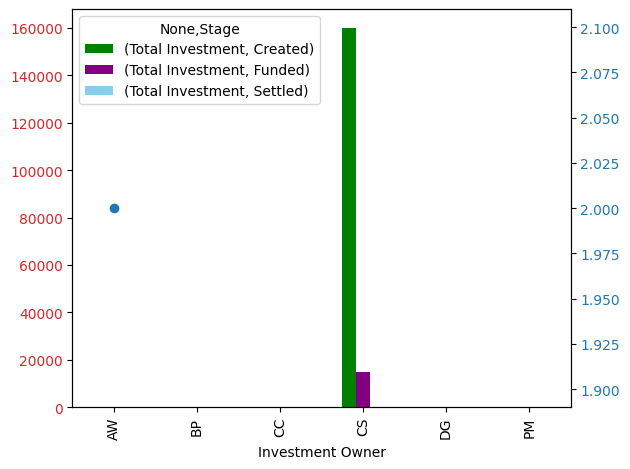

In [32]:
figtest, ax1 = plt.subplots()

color = 'tab:red'


daily_grouped_investment_data.plot.bar(ax=ax1, color=['green','purple','skyblue'])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax2.scatter(daily_grouped_discounts.index,daily_grouped_discounts['Discounted Bond?'])
ax2.tick_params(axis='y', labelcolor=color)

figtest.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

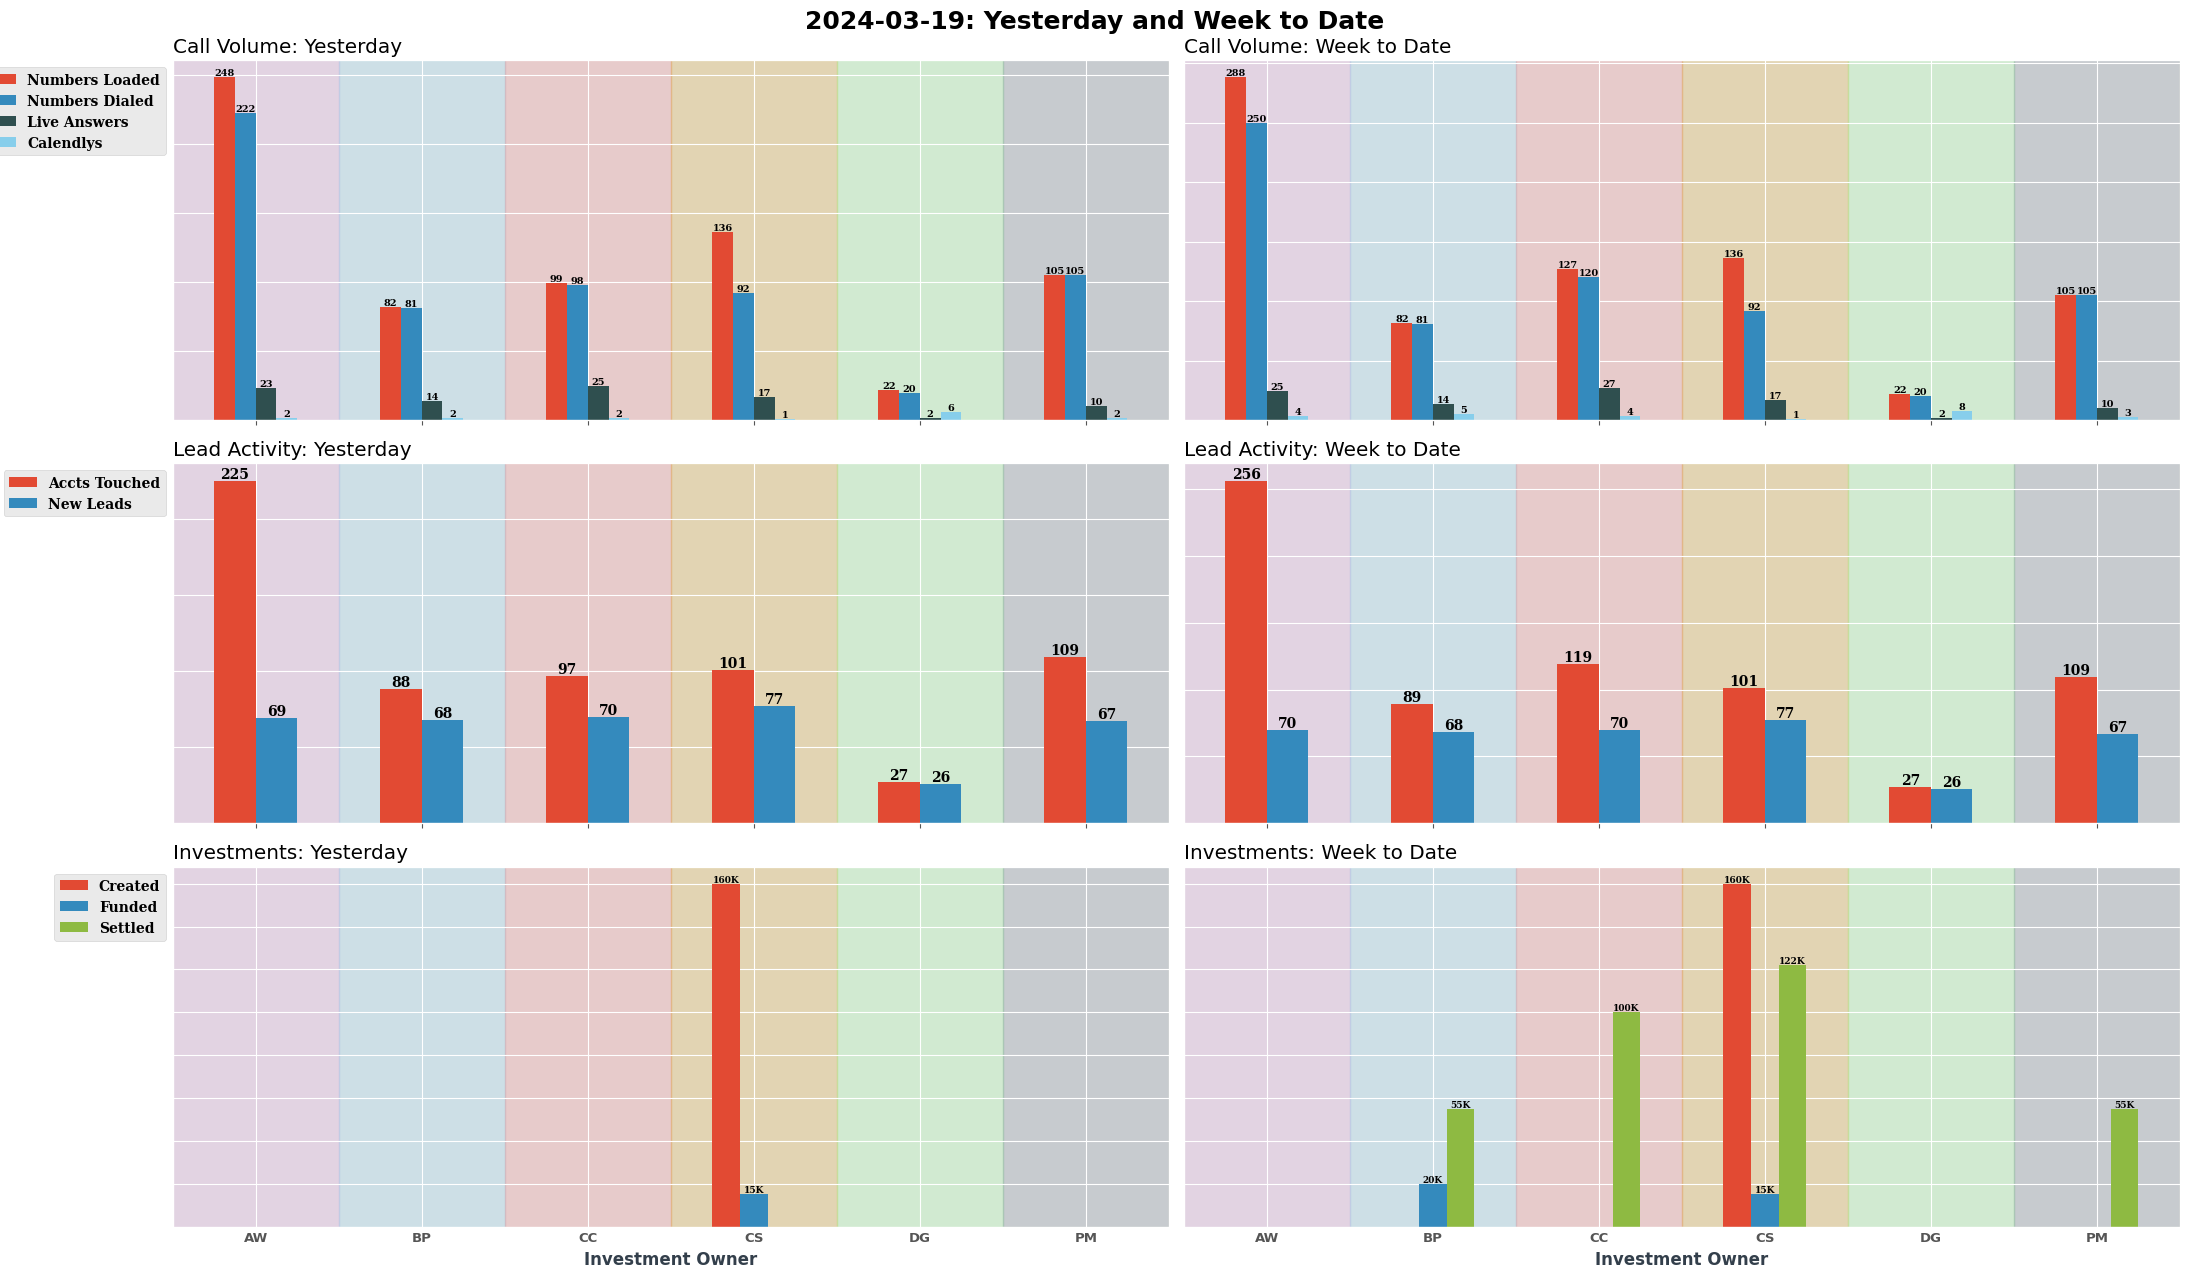

In [33]:
with plt.style.context('ggplot'):

    #define figures, format figures and graph all data
    fig1, axes = plt.subplots(3,2, sharex=True, figsize=(22,13))

    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
  
    # plt.rcParams['xtick.color']='#333F4B'
    # plt.rcParams['ytick.color']='#333F4B'
    if graph_yesterday == True and first_of_month == False:
        title = str(date.today()) + ': Yesterday and Week to Date'
        fig1.suptitle(title, fontweight="extra bold", fontsize=18, fontfamily='DejaVu Sans')
        axes[0,0].set_title('Call Volume: Yesterday', loc='left')
        axes[1,0].set_title('Lead Activity: Yesterday', loc='left')
        axes[2,0].set_title('Investments: Yesterday', loc='left')
    elif graph_yesterday == False and first_of_month == False:
        title = str(date.today()) + ': Friday and Week to Date'
        fig1.suptitle(title, fontweight="extra bold", fontsize=18, fontfamily='DejaVu Sans')
        axes[0,0].set_title('Call Volume: Friday', loc='left')
        axes[1,0].set_title('Lead Activity: Friday', loc='left')
        axes[2,0].set_title('Investments: Friday', loc='left')

    elif graph_yesterday == True and first_of_month == True:
        title = str(date.today()) + ': Today and Week to Date'
        fig1.suptitle(title, fontweight="extra bold", fontsize=18, fontfamily='DejaVu Sans')
        axes[0,0].set_title('Call Volume: Today', loc='left')
        axes[1,0].set_title('Lead Activity: Today', loc='left')
        axes[2,0].set_title('Investments: Today', loc='left')

    axes[0,1].set_title('Call Volume: Week to Date', loc='left')
    axes[1,1].set_title('Lead Activity: Week to Date', loc='left')
    axes[2,1].set_title('Investments: Week to Date', loc='left')

    fig1.subplots_adjust(hspace=0.4)


            #phone nums daily
    daily_grouped_phone_data.plot.bar(x='User',y=['Numbers Loaded','Numbers Dialed', 'Live Answer','Calendlys'], stacked=False,ax=axes[0,0],color=['#E24A33','#348ABD','darkslategrey','skyblue'])
    axes[0,0].legend(['Numbers Loaded','Numbers Dialed', 'Live Answers','Calendlys'], loc=0)
    axes[0,0].set_ylabel('')
    # axes[0].set_xlabel('')
    axes[0,0].bar_label(axes[0,0].containers[0],fontsize=7)
    axes[0,0].bar_label(axes[0,0].containers[1], fontsize=7)
    axes[0,0].bar_label(axes[0,0].containers[2], fontsize=7)
    axes[0,0].bar_label(axes[0,0].containers[3], fontsize=7)
    axes[0,0].set(yticklabels=[]) 
    axes[0,0].tick_params(left=False)

    

        #phone nums weekly
    weekly_grouped_phone_data.plot.bar(x='User',y=['Numbers Loaded','Numbers Dialed', 'Live Answer','Calendlys'], stacked=False,ax=axes[0,1],legend=None,color=['#E24A33','#348ABD','darkslategrey','skyblue'])
    axes[0,1].set_ylabel('')
    # axes[1].set_xlabel('')
    axes[0,1].bar_label(axes[0,1].containers[0],fontsize=7)
    axes[0,1].bar_label(axes[0,1].containers[1], fontsize=7)
    axes[0,1].bar_label(axes[0,1].containers[2], fontsize=7)
    axes[0,1].bar_label(axes[0,1].containers[3], fontsize=7)
    axes[0,1].set(yticklabels=[]) 
    axes[0,1].tick_params(left=False)
    
        #sf data daily
    daily_sf_data.plot.bar(x='Edited By',y=['Accts Touched','New Leads'],stacked=False,ax=axes[1,0])
    axes[1,0].legend(['Accts Touched','New Leads'], loc=0)
    axes[1,0].set_ylabel('')
    # axes[1].set_xlabel('')
    axes[1,0].bar_label(axes[1,0].containers[0], fontsize=10)
    axes[1,0].bar_label(axes[1,0].containers[1], fontsize=10)
    axes[1,0].set(yticklabels=[]) 
    axes[1,0].tick_params(left=False)

        #sf data weekly
    weekly_sf_data['Account ID'].plot.bar(stacked=False,ax=axes[1,1], legend=None)
    axes[1,1].set_ylabel('')
    # axes[1].set_xlabel('')
    axes[1,1].bar_label(axes[1,1].containers[0], fontsize=10)
    axes[1,1].bar_label(axes[1,1].containers[1], fontsize=10)
    axes[1,1].set(yticklabels=[]) 
    axes[1,1].tick_params(left=False)

        #investment daily
    daily_grouped_investment_data['Total Investment'].plot.bar(stacked=False, ax=axes[2,0], color=['#E24A33','#348ABD','#8EBA42'])

    # ax2 = axes[2,0].twinx()# instantiate a second axes that shares the same x-axis
    # ax2.legend()

    # ax2.scatter(daily_grouped_discounts.index,daily_grouped_discounts['Discounted Bond?'], color='orange', label='Discounts')

    axes[2,0].tick_params(labelrotation=0, labelsize = 9.5, labelfontfamily='DejaVu Sans', reset=True, length=0)
    axes[2,0].legend()
    axes[2,0].set_ylabel('')
    # axes[2].yaxis.set_major_formatter('${x:,.0f}')
    # axes[2].set_ylim(bottom=0, top=max)
    axes[2,0].set(yticklabels=[]) 
    format_bar_labels_currency(axes[2,0],0)
    format_bar_labels_currency(axes[2,0],1)
    format_bar_labels_currency(axes[2,0],2)


        #investment weekly
    weekly_grouped_investment_data['Total Investment'].plot.bar(stacked=False, ax=axes[2,1], legend=None,color=['#E24A33','#348ABD','#8EBA42'])

    axes[2,1].tick_params(labelrotation=0, labelsize = 9.5, labelfontfamily='DejaVu Sans', reset=True, length=0)
    axes[2,1].set_ylabel('')
    # axes[2].yaxis.set_major_formatter('${x:,.0f}')
    # axes[2].set_ylim(bottom=0, top=max)
    axes[2,1].set(yticklabels=[]) 

    format_bar_labels_currency(axes[2,1],0)
    format_bar_labels_currency(axes[2,1],1)
    format_bar_labels_currency(axes[2,1],2)

    sns.move_legend(axes[0,0], "upper right", bbox_to_anchor=(0, 1))
    sns.move_legend(axes[1,0], "upper right", bbox_to_anchor=(0, 1))
    sns.move_legend(axes[2,0], "upper right", bbox_to_anchor=(0, 1))
    axes[2,0].set_xlabel('Investment Owner', fontsize=12, fontfamily='DejaVu Sans', fontweight='bold', color = '#333F4B')

    # sns.move_legend(axes[0,0], "upper left", bbox_to_anchor=(1, 1))
    # sns.move_legend(axes[1,0], "upper left", bbox_to_anchor=(1, 1))
    # sns.move_legend(axes[2,0], "upper left", bbox_to_anchor=(1, 1))
    axes[2,1].set_xlabel('Investment Owner', fontsize=12, fontfamily='DejaVu Sans', fontweight='bold', color = '#333F4B')

for ax in range(0,3):
    axes[ax,0].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

for ax in range(0,1):
    axes[ax,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

for ax in range(1,2):
    axes[ax,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

for ax in range(2,3):
    axes[ax,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

    plt.tight_layout()
    plt.show()

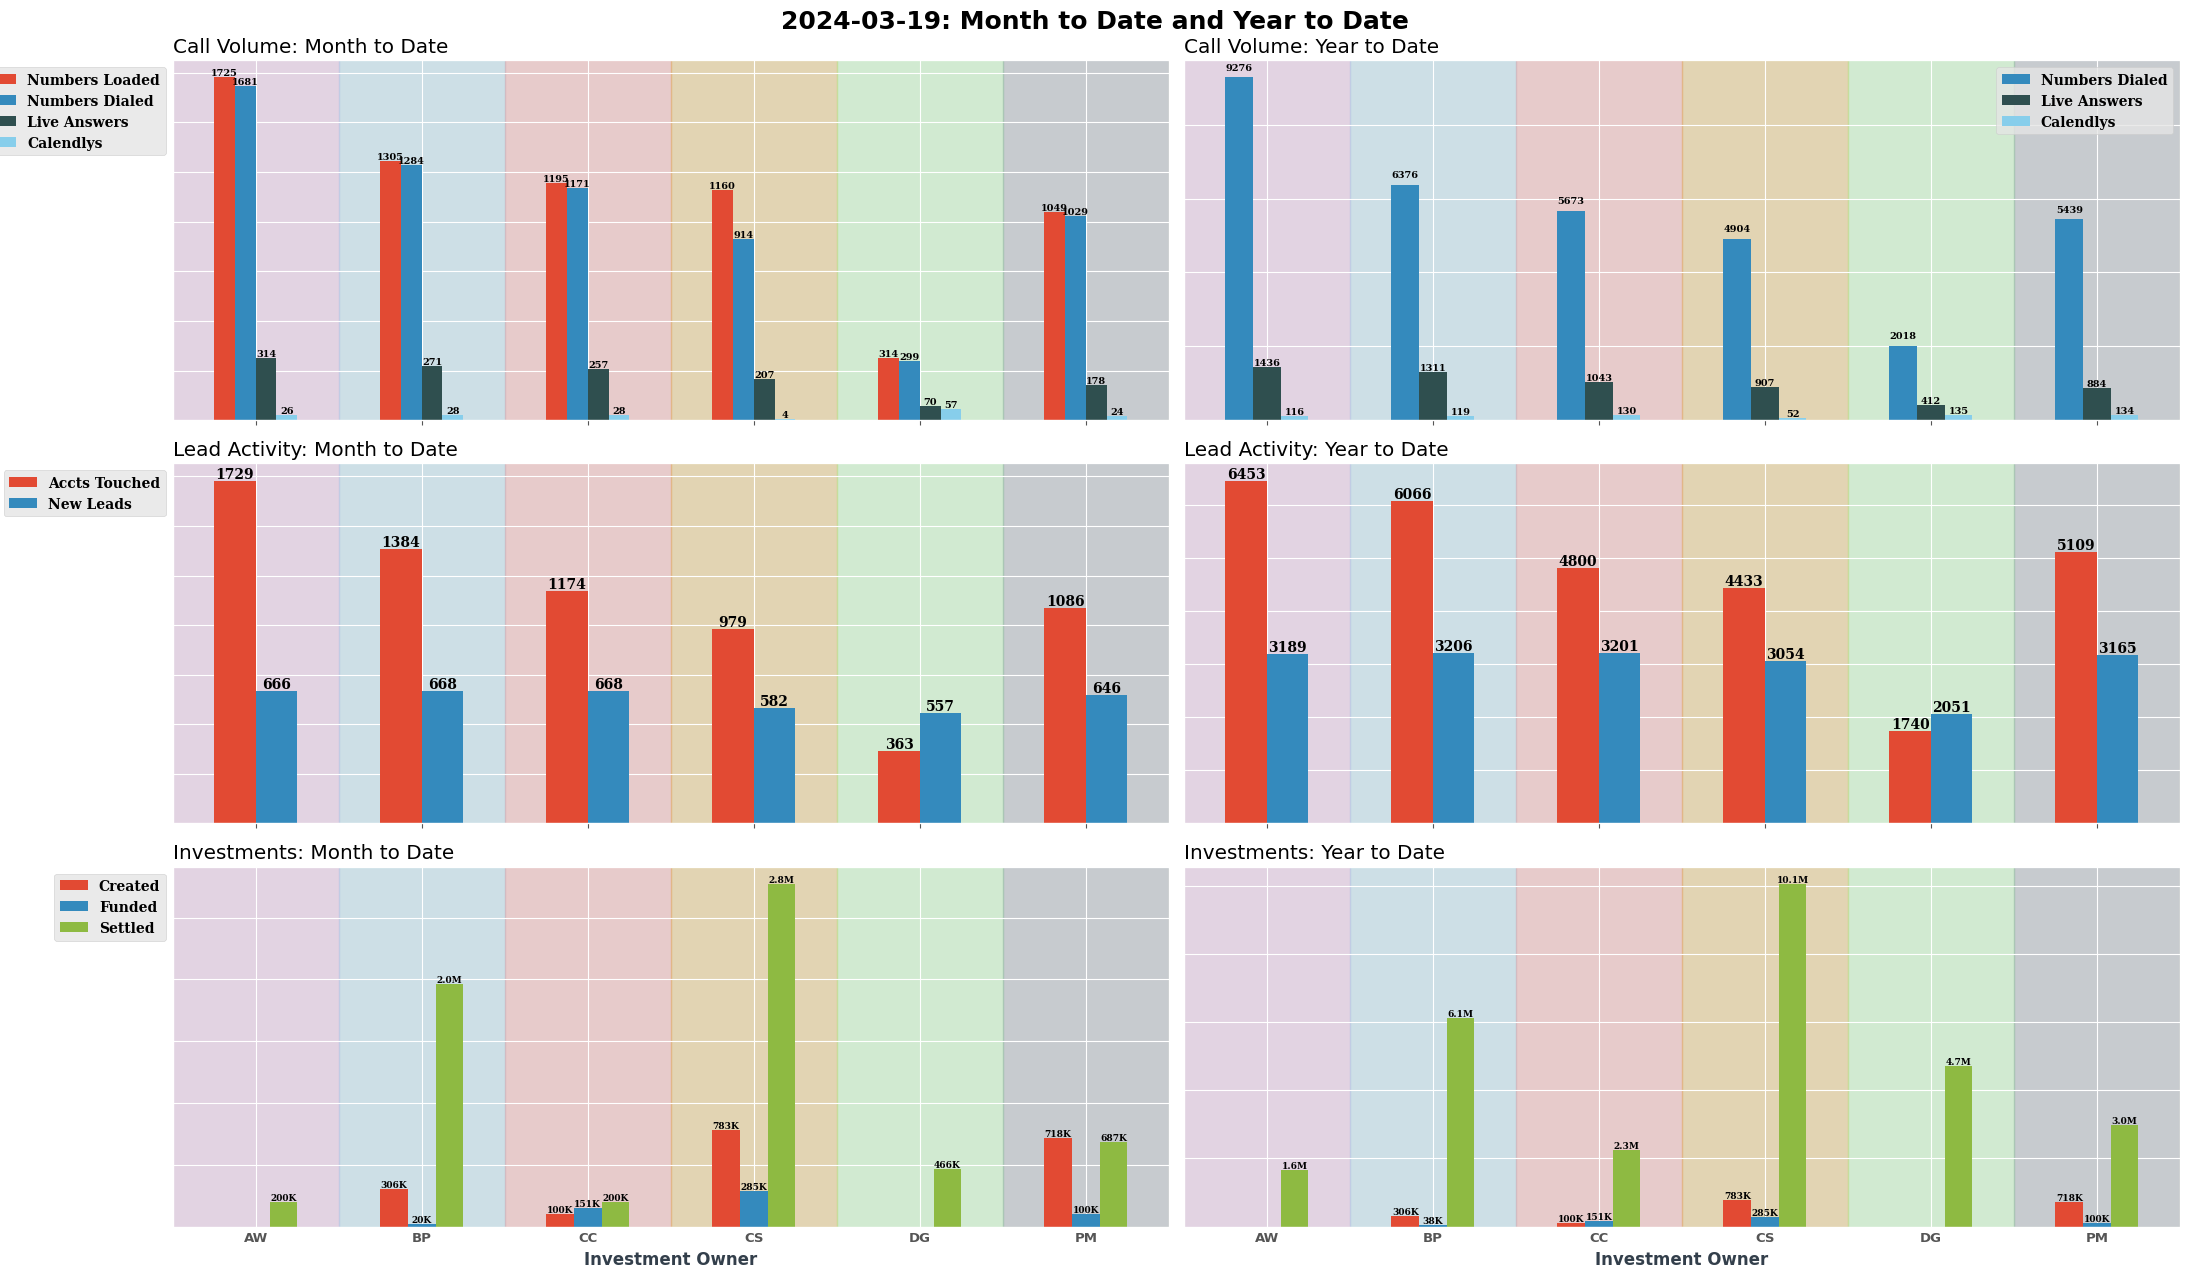

In [34]:
#Month to Date and Year to Date

with plt.style.context('ggplot'):

    #define figures, format figures and graph all data
    fig2, axes = plt.subplots(3,2, sharex=True, figsize=(22,13))

    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8

    # plt.rcParams['xtick.color']='#333F4B'
    # plt.rcParams['ytick.color']='#333F4B'
    axes[0,0].set_title('Call Volume: Month to Date', loc='left')
    axes[0,1].set_title('Call Volume: Year to Date', loc='left')
    axes[1,0].set_title('Lead Activity: Month to Date', loc='left')
    axes[1,1].set_title('Lead Activity: Year to Date', loc='left')
    axes[2,0].set_title('Investments: Month to Date', loc='left')
    axes[2,1].set_title('Investments: Year to Date', loc='left')
    title2 = str(date.today()) + ': Month to Date and Year to Date'
    fig2.suptitle(title2, fontweight="extra bold", fontsize=18, fontfamily='DejaVu Sans')
    fig2.subplots_adjust(hspace=0.4)


            #phone nums monthly
    monthly_grouped_phone_data.plot.bar(x='User',y=['Numbers Loaded','Numbers Dialed', 'Live Answer','Calendlys'], stacked=False,ax=axes[0,0],color=['#E24A33','#348ABD','darkslategrey','skyblue'])
    axes[0,0].legend(['Numbers Loaded','Numbers Dialed', 'Live Answers','Calendlys'])
    axes[0,0].set_ylabel('')
    axes[0,0].tick_params(left=False)
    # axes[0].set_xlabel('')
    axes[0,0].bar_label(axes[0,0].containers[0], fontsize=7)
    axes[0,0].bar_label(axes[0,0].containers[1], fontsize=7)
    axes[0,0].bar_label(axes[0,0].containers[2], fontsize=7)
    axes[0,0].bar_label(axes[0,0].containers[3], fontsize=7)
    axes[0,0].set(yticklabels=[]) 

        #phone nums yearly
    yearly_grouped_phone_data.plot.bar(x='User',y=['All_Calls','Live Talks','Calendlys'], stacked=False,ax=axes[0,1],legend=None,color=['#348ABD','darkslategrey','skyblue'])
    axes[0,1].legend(['Numbers Dialed','Live Answers','Calendlys'], loc=0)
    axes[0,1].set_ylabel('')
    axes[0,1].tick_params(left=False)
    # axes[1].set_xlabel('')
    axes[0,1].bar_label(axes[0,1].containers[0], fontsize=7, rotation=0, padding=4)
    axes[0,1].bar_label(axes[0,1].containers[1], fontsize=7, rotation=0)
    axes[0,1].bar_label(axes[0,1].containers[2], fontsize=7, rotation=0)
    # axes[0,1].bar_label(axes[0,1].containers[3], fontsize=7, rotation=0)
    axes[0,1].set(yticklabels=[]) 
    
        #sf data monthly
    monthly_sf_data['Account ID'].plot.bar(stacked=False,ax=axes[1,0])
    axes[1,0].legend(['Accts Touched','New Leads'], loc=0)
    axes[1,0].set_ylabel('')
    # axes[1].set_xlabel('')
    axes[1,0].bar_label(axes[1,0].containers[0], fontsize=10)
    axes[1,0].bar_label(axes[1,0].containers[1], fontsize=10)
    axes[1,0].set(yticklabels=[]) 
    axes[1,0].tick_params(left=False)

        #sf data yearly
    yearly_sf_data['Account ID'].plot.bar(stacked=False,ax=axes[1,1], legend=None)
    # axes[1,1].legend(['Accts Touched','New Leads'], loc=0)
    axes[1,1].set_ylabel('')
    # axes[1].set_xlabel('')
    axes[1,1].bar_label(axes[1,1].containers[0], fontsize=10)
    axes[1,1].bar_label(axes[1,1].containers[1], fontsize=10)
    axes[1,1].set(yticklabels=[]) 
    axes[1,1].tick_params(left=False)

        #investment monthly
    monthly_grouped_investment_data['Total Investment'].plot.bar(stacked=False, ax=axes[2,0],  color=['#E24A33','#348ABD','#8EBA42'])

    axes[2,0].tick_params(labelrotation=0, labelsize = 9.5, labelfontfamily='DejaVu Sans', reset=True, length=0)
    axes[2,0].legend()
    axes[2,0].set_ylabel('')
    # axes[2].yaxis.set_major_formatter('${x:,.0f}')
    # axes[2].set_ylim(bottom=0, top=max)
    axes[2,0].set(yticklabels=[]) 
    format_bar_labels_currency(axes[2,0],0)
    format_bar_labels_currency(axes[2,0],1)
    format_bar_labels_currency(axes[2,0],2)

        #investment yearly
    yearly_grouped_investment_data['Total Investment'].plot.bar(stacked=False, ax=axes[2,1], legend=None,color=['#E24A33','#348ABD','#8EBA42'])

    axes[2,1].tick_params(labelrotation=0, labelsize = 9.5, labelfontfamily='DejaVu Sans', reset=True, length=0)
    axes[2,1].set_xticklabels(['AW','BP','CC','CS','DG','PM'])
    # axes[2,1].legend()
    axes[2,1].set_ylabel('')
    # axes[2].yaxis.set_major_formatter('${x:,.0f}')
    # axes[2].set_ylim(bottom=0, top=max)
    axes[2,1].set(yticklabels=[]) 

    format_bar_labels_currency(axes[2,1],0)
    format_bar_labels_currency(axes[2,1],1)
    format_bar_labels_currency(axes[2,1],2)

    sns.move_legend(axes[0,0], "upper right", bbox_to_anchor=(0, 1))
    sns.move_legend(axes[0,1], "upper right")
    sns.move_legend(axes[1,0], "upper right", bbox_to_anchor=(0, 1))
    sns.move_legend(axes[2,0], "upper right", bbox_to_anchor=(0, 1))
    axes[2,0].set_xlabel('Investment Owner', fontsize=12, fontfamily='DejaVu Sans', fontweight='bold', color = '#333F4B')

    # sns.move_legend(axes[0,0], "upper left", bbox_to_anchor=(1, 1))
    # sns.move_legend(axes[1,0], "upper left", bbox_to_anchor=(1, 1))
    # sns.move_legend(axes[2,0], "upper left", bbox_to_anchor=(1, 1))
    axes[2,1].set_xlabel('Investment Owner', fontsize=12, fontfamily='DejaVu Sans', fontweight='bold', color = '#333F4B')
for ax in range(0,3):
    axes[ax,0].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,0].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

for ax in range(0,1):
    axes[ax,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

for ax in range(1,2):
    axes[ax,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)

for ax in range(2,3):
    axes[ax,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(4.5, 5.5, color='slategrey', alpha=0.25, zorder=0)
    axes[ax,1].axvspan(5.5, 6.5, color='wheat', alpha=0.25, zorder=0)
    plt.tight_layout()
    plt.show()


In [35]:
def format_bar_labels_currency2(plot,i):
    label=[]
    try:
        for num in plot.containers[i].datavalues:
            if num != 0 and num != '':
                label.append(format_number(num))
            else:
                label.append('')
        plot.bar_label(plot.containers[i], labels=label, fontsize=3.7)
    except IndexError:
        x = None
    

    return label

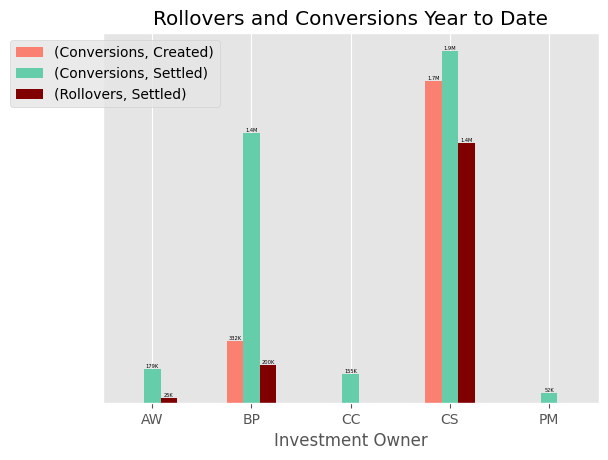

In [36]:
with plt.style.context('ggplot'):   
    fig3, ax = plt.subplots(1) 
    rollovers_conversions_redemps.plot.bar(color=['salmon','mediumaquamarine','maroon','seagreen'], ax=ax)
    plt.legend(loc='upper right', bbox_to_anchor=(0.25, 1))
    plt.title('Rollovers and Conversions Year to Date')
    plt.yticks([])
    plt.xticks(rotation=0)

    format_bar_labels_currency2(ax,0)
    format_bar_labels_currency2(ax,1)
    format_bar_labels_currency2(ax,2)
    format_bar_labels_currency2(ax,3)
    plt.show()

In [37]:
def write_unique_file(output_path):
    
    base,ext = os.path.splitext(output_path)
    count = 0
    if os.path.exists(output_path):

        while os.path.exists(output_path):
                count += 1
                output_path = f'{base}_{count}{ext}'
        # print(output_path)
        return output_path
    else:
        # print(output_path)
        return output_path

In [38]:
base_path = 'C:\\Users\\Hannah Nevel\\Documents\\Weekly Reporting - CM\\CM Reports - year to date\\2024\\'
todays_date = str(date.today())
folder_path = cf.create_folder(base_path,todays_date)

In [39]:
todays_date = str(date.today())
save_filename = 'Daily CM Reporting - ' + todays_date + '.pdf'
filepath = folder_path + '\\' +save_filename
unique_filename = cf.write_unique_file(filepath)
with PdfPages(unique_filename) as pdf:
    pdf.savefig(fig1, bbox_inches='tight')
    pdf.savefig(fig2, bbox_inches='tight')
    pdf.savefig(fig3, bbox_inches='tight')

yearly_investment_data.to_excel(folder_path + '\\Investment Data Year to Date - '+ todays_date + '.xlsx',index=False)
ytd_conversion_list.to_excel(folder_path + '\\Conversion Data Year to Date - '+ todays_date+ '.xlsx',index=False)
mtd_loaded_phone_data.to_csv(folder_path + '\\Phone Data Month to Date - '+ todays_date + '.csv',index=False)
yearly_phone_data.to_csv(folder_path + '\\Phone Data Year to Date - '+ todays_date + '.csv',index=False)
yearly_newlead_data.to_excel(folder_path + '\\New Lead Data Year to Date - '+ todays_date + '.xlsx',index=False)
yearly_acctstouched_data.to_excel(folder_path + '\\Accounts Touched Data Year to Date - '+ todays_date + '.xlsx',index=False)
calendly_past.to_csv(folder_path + '\\calendly YTD - ' + todays_date +'.csv', index=False)
